In [324]:
import tushare as ts
print(f"tushare version:{ts.__version__}")
token = "8ef5ec61cdd848715c57c11d58dd71da1271f76b2420d2bac8aef123"
import os
#os.listdir()
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

tushare version:1.2.54


In [5]:
pro = ts.pro_api(token)

In [179]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 根据期货合约信息表 (fut_basic) 提取:
* 品种/name， 交易代码/symbol， 交易所/exchange， 主力：fut_type = 1， 全部：不写fut_type

In [309]:
"""
主力连续合约
"""
mc = pro.fut_basic(exchange='SHFE', fut_type='2', fields='ts_code,symbol,name,list_date,delist_date')
print("\t|合约代码|交易标识|中文简称|上市日期|最后交易日期|")
## Remove the last two words
mc.name = mc.name.str[:-2] 

## SHFE产品名称做相应更改
mc.loc[mc.loc[mc.name =='沪金'].index, 'name'] = '黄金'
mc.loc[mc.loc[mc.name =='沪镍'].index, 'name'] = '镍'
mc.loc[mc.loc[mc.name =='沪锡'].index, 'name'] = '锡'
mc.loc[mc.loc[mc.name =='沪铜'].index, 'name'] = '铜'
mc.loc[mc.loc[mc.name =='燃油'].index, 'name'] = '燃料油'
mc.loc[mc.loc[mc.name =='沪铜'].index, 'name'] = '铜'
mc.loc[mc.loc[mc.name =='螺纹'].index, 'name'] = '螺纹钢'
mc.loc[mc.loc[mc.name =='沪银'].index, 'name'] = '银'
mc.loc[mc.loc[mc.name =='沪铝'].index, 'name'] = '铝'
mc.loc[mc.loc[mc.name =='沪锌'].index, 'name'] = '锌'
mc.loc[mc.loc[mc.name =='沪铅'].index, 'name'] = '铅'
Symbols_ml = mc.iloc[:,:-2]
Symbols_ml.head()

	|合约代码|交易标识|中文简称|上市日期|最后交易日期|


,ts_code,symbol,name
0,SS.SHF,SS,不锈钢
1,AUL.SHF,AUL,黄金
2,AL.SHF,AL,铝
3,SNL.SHF,SNL,锡
4,CU.SHF,CU,铜


In [239]:
ml_ts_codes = list(Symbols_ml.ts_code.unique())
ml_ts_codes[:5]##主力连续合约的ts_code

['SS.SHF', 'AUL.SHF', 'AL.SHF', 'SNL.SHF', 'CU.SHF']

In [318]:
"""
普通合约
"""
mc = pro.fut_basic(exchange='SHFE', fut_type = '1', fields='ts_code,symbol,name,list_date,delist_date')
## Remove the symbol for ordinary contracts
mc.name = mc.name.str[:-4]

## SHFE产品名称做相应更改
mc.loc[mc.loc[mc.name =='沪金'].index, 'name'] = '黄金'
mc.loc[mc.loc[mc.name =='沪镍'].index, 'name'] = '镍'
mc.loc[mc.loc[mc.name =='沪锡'].index, 'name'] = '锡'
mc.loc[mc.loc[mc.name =='沪铜'].index, 'name'] = '铜'
mc.loc[mc.loc[mc.name =='燃油'].index, 'name'] = '燃料油'
mc.loc[mc.loc[mc.name =='沪铜'].index, 'name'] = '铜'
mc.loc[mc.loc[mc.name =='螺纹'].index, 'name'] = '螺纹钢'
mc.loc[mc.loc[mc.name =='沪银'].index, 'name'] = '银'
mc.loc[mc.loc[mc.name =='沪铝'].index, 'name'] = '铝'
mc.loc[mc.loc[mc.name =='沪锌'].index, 'name'] = '锌'
mc.loc[mc.loc[mc.name =='沪铅'].index, 'name'] = '铅'
Symbols_ord = mc.iloc[:,:-2]
Symbols_ord.head()

,ts_code,symbol,name
0,AL1508.SHF,AL1508,铝
1,RU1508.SHF,RU1508,橡胶
2,RB1508.SHF,RB1508,螺纹钢
3,AG1508.SHF,AG1508,银
4,HC1508.SHF,HC1508,热轧卷板


In [325]:
"""
合并成全部合约
"""
ord_ts_codes = list(Symbols_ord.ts_code.unique())
all_ts_codes = ord_ts_codes + ml_ts_codes
print(all_ts_codes[:5],f"共有{len(all_ts_codes)}条数据")## 全部合约的ts_code
Symbols_all = pd.concat([Symbols_ord, Symbols_ml])
Symbols_all.head()

['AL1508.SHF', 'RU1508.SHF', 'RB1508.SHF', 'AG1508.SHF', 'HC1508.SHF'] 共有2264条数据


,ts_code,symbol,name
0,AL1508.SHF,AL1508,铝
1,RU1508.SHF,RU1508,橡胶
2,RB1508.SHF,RB1508,螺纹钢
3,AG1508.SHF,AG1508,银
4,HC1508.SHF,HC1508,热轧卷板


## 期货日线行情(fut_daily)提取：
* Open, High, Low, Close

In [235]:
futures_daily = pro.fut_daily(ts_code = "CU.SHF", start_date = "20180101", end_date = "20191231")
daily_columns = "合约代码|交易日期|昨日收盘价|昨日结算价|开盘价|最高价|最低价|收盘价|结算价|收盘价-昨日结算价|结算价-昨日结算价|成交量|成交金额（万)|持仓量|持仓量变化".split("|")
for c in daily_columns: print("", c, end = "|")
futures_daily.head()

 合约代码| 交易日期| 昨日收盘价| 昨日结算价| 开盘价| 最高价| 最低价| 收盘价| 结算价| 收盘价-昨日结算价| 结算价-昨日结算价| 成交量| 成交金额（万)| 持仓量| 持仓量变化|

,ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,change1,change2,vol,amount,oi,oi_chg
0,CU.SHF,20191231,49510.0,49440.0,49420.0,49490.0,49110.0,49150.0,49280.0,-290.0,-160.0,144680.0,3565417.15,239454.0,None
1,CU.SHF,20191230,49730.0,49690.0,49590.0,49610.0,49230.0,49510.0,49440.0,-180.0,-250.0,185304.0,4581524.85,265760.0,None
2,CU.SHF,20191227,49650.0,49640.0,49660.0,49820.0,49590.0,49730.0,49690.0,90.0,50.0,125240.0,3111798.46,284388.0,None
3,CU.SHF,20191226,49600.0,49530.0,49640.0,49940.0,49450.0,49650.0,49640.0,120.0,110.0,154242.0,3828920.07,284310.0,None
4,CU.SHF,20191225,49590.0,49290.0,49500.0,49710.0,49390.0,49600.0,49530.0,310.0,240.0,133218.0,3299529.32,284464.0,None


* The amount can be simulated with OHLC and Vol for each day, and the error is low

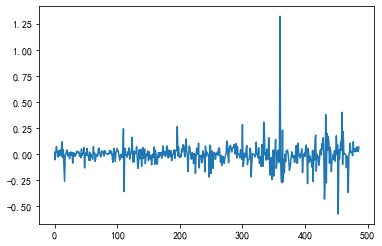

In [237]:
test = futures_daily.copy()
test['my_amnt'] = (0.5*(test.high+test.low)*test.vol/2000)
test['error'] = (test.my_amnt - test.amount)/(0.5*(test.high+test.low))

plt.plot(list(range(len(test))), test.error)

In [261]:
"""
提取主力连续合约的OHLC信息
"""
ml_OHLC = pd.DataFrame(columns = futures_daily.columns)
failed_symbols = []
for ts_c in ml_ts_codes:
    daily = pro.fut_daily(ts_code = ts_c, start_date = "20180101", end_date = "20191231")
    ml_OHLC = pd.concat([ml_OHLC, daily])
    if len(daily):
        print(f"Successfully get {ts_c} data! -- {len(daily)} rows", end = " / ")
        continue
    print("XXXX", end = " / ")
    failed_symbols.append(ts_c)
print(f"\n{len(failed_symbols)} symbols failed!")
ml_OHLC.reset_index(drop = True, inplace = True)
OHLC_ml = ml_OHLC.drop(columns = ['pre_close','pre_settle',"change1","change2","oi","oi_chg"])
OHLC_ml.amount *= 10000
OHLC_ml.head()

Successfully get SS.SHF data! -- 65 rows / Successfully get AUL.SHF data! -- 487 rows / Successfully get AL.SHF data! -- 487 rows / Successfully get SNL.SHF data! -- 487 rows / Successfully get CU.SHF data! -- 487 rows / Successfully get ZN.SHF data! -- 487 rows / Successfully get AG.SHF data! -- 487 rows / Successfully get RB.SHF data! -- 487 rows / Successfully get BUL.SHF data! -- 487 rows / Successfully get SN.SHF data! -- 487 rows / Successfully get FUL.SHF data! -- 474 rows / Successfully get AGL.SHF data! -- 487 rows / Successfully get NI.SHF data! -- 487 rows / Successfully get HCL.SHF data! -- 487 rows / Successfully get PBL.SHF data! -- 487 rows / Successfully get WR.SHF data! -- 462 rows / Successfully get NIL.SHF data! -- 487 rows / Successfully get RBL.SHF data! -- 487 rows / Successfully get CUL.SHF data! -- 487 rows / Successfully get FU.SHF data! -- 474 rows / Successfully get AU.SHF data! -- 487 rows / Successfully get ALL.SHF data! -- 487 rows / Successfully get PB.SH

,ts_code,trade_date,open,high,low,close,settle,vol,amount
0,SS.SHF,20191231,14175.0,14860.0,14175.0,14410.0,14350.0,21314.0,1.529810e+09
1,SS.SHF,20191230,14220.0,14355.0,14220.0,14345.0,14300.0,4904.0,3.506540e+08
2,SS.SHF,20191227,14260.0,14320.0,14070.0,14240.0,14250.0,5338.0,3.803478e+08
3,SS.SHF,20191226,14240.0,14290.0,14240.0,14270.0,14265.0,2684.0,1.914938e+08
4,SS.SHF,20191225,14330.0,14330.0,14240.0,14240.0,14275.0,6002.0,4.284192e+08


In [329]:
"""
提取全部合约的OHLC信息, 数据较多，先取样本, 
"""
all_OHLC = pd.DataFrame(columns = futures_daily.columns)
failed_symbols = []
for ts_c in all_ts_codes[2000:2030]:
    daily = pro.fut_daily(ts_code = ts_c, start_date = "20180101", end_date = "20191231")
    all_OHLC = pd.concat([all_OHLC, daily])
    if len(daily):
        print(f"Successfully get {ts_c} data! -- {len(daily)} rows", end = " / ")
        continue
    print("XXXX", end = " / ")
    failed_symbols.append(ts_c)
print(f"\n{len(failed_symbols)} symbols failed!")
all_OHLC.reset_index(drop = True, inplace = True)
OHLC_all = all_OHLC.drop(columns = ['pre_close','pre_settle',"change1","change2","oi","oi_chg"])
OHLC_all.amount *= 10000
OHLC_all.head()

XXXX / XXXX / XXXX / Successfully get FU2001.SHF data! -- 237 rows / XXXX / Successfully get FU2002.SHF data! -- 226 rows / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / Successfully get FU2006.SHF data! -- 144 rows / XXXX / XXXX / XXXX / XXXX / XXXX / XXXX / Successfully get RB2007.SHF data! -- 115 rows / 
26 symbols failed!


,ts_code,trade_date,open,high,low,close,settle,vol,amount
0,FU2001.SHF,20191220,1987.0,2108.0,1945.0,2107.0,2004.0,624.0,1.250728e+07
1,FU2001.SHF,20191219,1955.0,1992.0,1901.0,1985.0,1968.0,3000.0,5.905776e+07
2,FU2001.SHF,20191218,1965.0,1998.0,1940.0,1958.0,1969.0,7774.0,1.531122e+08
3,FU2001.SHF,20191217,2080.0,2098.0,1933.0,1965.0,2032.0,97594.0,1.983423e+09
4,FU2001.SHF,20191216,2100.0,2105.0,2016.0,2066.0,2064.0,92864.0,1.917306e+09


* 存在交易量为0的数据，需要清理

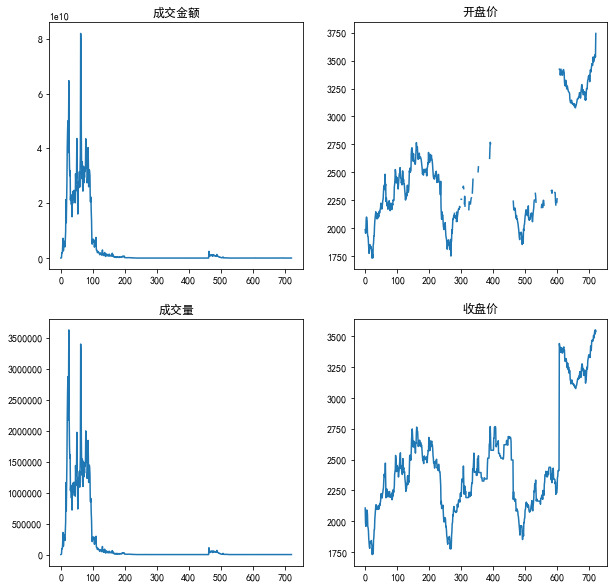

In [330]:
df = OHLC_all
data_ind = list(range(len(df)))
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(data_ind, df.amount)
ax[0,0].set_title("成交金额")

ax[0,1].plot(data_ind, df.open)
ax[0,1].set_title("开盘价")

ax[1,0].plot(data_ind, df.vol)
ax[1,0].set_title("成交量")

ax[1,1].plot(data_ind, df.close)
ax[1,1].set_title("收盘价")
plt.show()

## 结算参数(fut_settle)提取：
* 手续费/trading_fee, 保证金/margin_rate

In [361]:
"""
fut_settle rejects the parameter "ts_code", we have to search ALL the data and filter out the irreative ones
"""
all_settle = pro.fut_settle(start_date = "20180101",end_date = "20191231", exchange = "SHFE")
drop_ind_ml = []
drop_ind_all =[]
### 记录主力连续与全部合约的有效数据
for index, row in all_settle.iterrows():
    if row.ts_code in ord_ts_codes:
        drop_ind_ml.append(index)
    elif row.ts_code not in all_ts_codes:
        drop_ind_all.append(index)
print(f"Among all {len(all_settle)} data, {len(drop_ind_ml)} will be removed for '主力连续合约' and {len(drop_ind_all)} will be removed for '全部合约'")

Among all 1600 data, 1600 will be removed for '主力连续合约' and 0 will be removed for '全部合约'


In [334]:
"""
主力连续合约
"""
ml = all_settle.drop(drop_ind_ml) \
                              .reset_index(drop = True) \
                              .drop(columns = ['trading_fee_rate', 'delivery_fee'])
ml['margin_rate'] = 100*0.25*(ml.b_hedging_margin_rate 
                                         + ml.s_hedging_margin_rate 
                                         + ml.long_margin_rate 
                                         + ml.short_margin_rate)

ml = ml.drop(columns = ['b_hedging_margin_rate', 's_hedging_margin_rate', 'long_margin_rate', 'short_margin_rate'])
TFMR_ml = ml
TFMR_ml.head()

,ts_code,trade_date,settle,trading_fee,margin_rate


In [335]:
"""
全部合约
"""
ml = all_settle.drop(drop_ind_all) \
                              .reset_index(drop = True) \
                              .drop(columns = ['trading_fee_rate', 'delivery_fee'])
ml['margin_rate'] = 100*0.25*(ml.b_hedging_margin_rate 
                                         + ml.s_hedging_margin_rate 
                                         + ml.long_margin_rate 
                                         + ml.short_margin_rate)

ml = ml.drop(columns = ['b_hedging_margin_rate', 's_hedging_margin_rate', 'long_margin_rate', 'short_margin_rate'])
TFMR_all = ml
TFMR_all.head()

,ts_code,trade_date,settle,trading_fee,margin_rate
0,AU2012.SHF,20191231,350.02,10.0,6.0
1,AU2010.SHF,20191231,349.56,2.0,6.0
2,AU2008.SHF,20191231,347.90,2.0,6.0
3,AU2006.SHF,20191231,346.54,10.0,6.0
4,AU2004.SHF,20191231,344.38,2.0,6.0


## Merge all relative data--主力合约

In [336]:
Symbols_ml.head()

,ts_code,symbol,name
0,SS.SHF,SS,不锈钢
1,AUL.SHF,AUL,黄金
2,AL.SHF,AL,铝
3,SNL.SHF,SNL,锡
4,CU.SHF,CU,铜


In [337]:
OHLC_ml.head()

,ts_code,trade_date,open,high,low,close,settle,vol,amount
0,SS.SHF,20191231,14175.0,14860.0,14175.0,14410.0,14350.0,21314.0,1.529810e+09
1,SS.SHF,20191230,14220.0,14355.0,14220.0,14345.0,14300.0,4904.0,3.506540e+08
2,SS.SHF,20191227,14260.0,14320.0,14070.0,14240.0,14250.0,5338.0,3.803478e+08
3,SS.SHF,20191226,14240.0,14290.0,14240.0,14270.0,14265.0,2684.0,1.914938e+08
4,SS.SHF,20191225,14330.0,14330.0,14240.0,14240.0,14275.0,6002.0,4.284192e+08


In [345]:
OHLC_ml_clean = OHLC_ml.dropna().reset_index(drop = True)
OHLC_ml_clean.tail()

,ts_code,trade_date,open,high,low,close,settle,vol,amount
12177,SPL.SHF,20181203,5158.0,5262.0,4970.0,4978.0,5076.0,1415596.0,7.185809e+10
12178,SPL.SHF,20181130,5208.0,5220.0,5114.0,5148.0,5168.0,897506.0,4.638819e+10
12179,SPL.SHF,20181129,5160.0,5294.0,5122.0,5188.0,5218.0,985508.0,5.142555e+10
12180,SPL.SHF,20181128,5300.0,5314.0,5142.0,5184.0,5222.0,1027208.0,5.365931e+10
12181,SPL.SHF,20181127,5828.0,5830.0,5382.0,5382.0,5558.0,471124.0,2.618647e+10


In [340]:
OHLC_ml.isna().sum(axis = 0)

ts_code          0
trade_date       0
open          2044
high          2044
low           2044
close            0
settle           0
vol              0
amount           0
dtype: int64

In [338]:
TFMR_ml.head()

,ts_code,trade_date,settle,trading_fee,margin_rate


In [366]:
TFMR_ml.empty

True

In [346]:
SHFE_ml = Symbols_ml.merge(OHLC_ml_clean, on = "ts_code")#.merge(TFMR_ml, on = 'ts_code')
print(f"Totally generate {len(SHFE_ml)} rows of data!")
SHFE_ml.dropna(inplace = True)
print(f"After removing null data, we have {len(SHFE_ml)} rows of data left!")
SHFE_ml.head()

Totally generate 12182 rows of data!
After removing null data, we have 12182 rows of data left!


,ts_code,symbol,name,trade_date,open,high,low,close,settle,vol,amount
0,SS.SHF,SS,不锈钢,20191231,14175.0,14860.0,14175.0,14410.0,14350.0,21314.0,1.529810e+09
1,SS.SHF,SS,不锈钢,20191230,14220.0,14355.0,14220.0,14345.0,14300.0,4904.0,3.506540e+08
2,SS.SHF,SS,不锈钢,20191227,14260.0,14320.0,14070.0,14240.0,14250.0,5338.0,3.803478e+08
3,SS.SHF,SS,不锈钢,20191226,14240.0,14290.0,14240.0,14270.0,14265.0,2684.0,1.914938e+08
4,SS.SHF,SS,不锈钢,20191225,14330.0,14330.0,14240.0,14240.0,14275.0,6002.0,4.284192e+08


## Merge all relative data --全部合约

In [347]:
Symbols_all.head()

,ts_code,symbol,name
0,AL1508.SHF,AL1508,铝
1,RU1508.SHF,RU1508,橡胶
2,RB1508.SHF,RB1508,螺纹钢
3,AG1508.SHF,AG1508,银
4,HC1508.SHF,HC1508,热轧卷板


In [351]:
OHLC_all_clean = OHLC_all.dropna().reset_index(drop = True)
OHLC_all_clean.head()

,ts_code,trade_date,open,high,low,close,settle,vol,amount
0,FU2001.SHF,20191220,1987.0,2108.0,1945.0,2107.0,2004.0,624.0,1.250728e+07
1,FU2001.SHF,20191219,1955.0,1992.0,1901.0,1985.0,1968.0,3000.0,5.905776e+07
2,FU2001.SHF,20191218,1965.0,1998.0,1940.0,1958.0,1969.0,7774.0,1.531122e+08
3,FU2001.SHF,20191217,2080.0,2098.0,1933.0,1965.0,2032.0,97594.0,1.983423e+09
4,FU2001.SHF,20191216,2100.0,2105.0,2016.0,2066.0,2064.0,92864.0,1.917306e+09


In [349]:
TFMR_all.head()

,ts_code,trade_date,settle,trading_fee,margin_rate
0,AU2012.SHF,20191231,350.02,10.0,6.0
1,AU2010.SHF,20191231,349.56,2.0,6.0
2,AU2008.SHF,20191231,347.90,2.0,6.0
3,AU2006.SHF,20191231,346.54,10.0,6.0
4,AU2004.SHF,20191231,344.38,2.0,6.0


In [362]:
SHFE_all = Symbols_all.merge(OHLC_all_clean, on = "ts_code")#.merge(TFMR_ml, on = 'ts_code')
print(f"Totally generate {len(SHFE_all)} rows of data!")
SHFE_all.dropna(inplace = True)
print(f"After removing null data, we have {len(SHFE_all)} rows of data left!")
SHFE_all.head()

Totally generate 539 rows of data!
After removing null data, we have 539 rows of data left!


,ts_code,symbol,name,trade_date,open,high,low,close,settle,vol,amount
0,FU2001.SHF,FU2001,燃料油,20191220,1987.0,2108.0,1945.0,2107.0,2004.0,624.0,1.250728e+07
1,FU2001.SHF,FU2001,燃料油,20191219,1955.0,1992.0,1901.0,1985.0,1968.0,3000.0,5.905776e+07
2,FU2001.SHF,FU2001,燃料油,20191218,1965.0,1998.0,1940.0,1958.0,1969.0,7774.0,1.531122e+08
3,FU2001.SHF,FU2001,燃料油,20191217,2080.0,2098.0,1933.0,1965.0,2032.0,97594.0,1.983423e+09
4,FU2001.SHF,FU2001,燃料油,20191216,2100.0,2105.0,2016.0,2066.0,2064.0,92864.0,1.917306e+09
